In [1]:
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

gfz = Client('GFZ')
gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
starttime = UTCDateTime(2015,8,1)
endtime = UTCDateTime(2015,8,5)
sc.download_waveforms_mdl(starttime,endtime,clients=[gfz], network='D0', station='*')

FDSNException: Bad request. If you think your request was valid please contact the developers.
Detailed response of server:

Error 400: Bad Request
token is expired
Usage details are available from /fdsnws/dataselect/1/
Request:
/fdsnws/dataselect/1/auth
Request Submitted:
2021-05-11T13:07:35.37769
Service Version:
1.1.0

In [44]:
# Try to read in the files written in the section above
sc.read_only=True
st = sc.get_waveforms('D0', 'BDR', '*', '*', UTCDateTime(0), UTCDateTime(2100,1,1),_check_times=False)
print(st)

Loading locally ... Success
15 Trace(s) in Stream:
D0.BDR.01.SHE | 2015-08-01T00:00:00.000000Z - 2015-08-01T02:22:21.495000Z | 200.0 Hz, 1708300 samples
D0.BDR.01.SHN | 2015-08-01T00:00:00.000000Z - 2015-08-01T02:22:18.470000Z | 200.0 Hz, 1707695 samples
D0.BDR.01.SHZ | 2015-08-01T00:00:00.000000Z - 2015-08-01T02:22:19.715000Z | 200.0 Hz, 1707944 samples
D0.BDR.01.SHN | 2015-08-01T02:22:19.475000Z - 2015-08-01T03:11:20.660000Z | 200.0 Hz, 588238 samples
D0.BDR.01.SHZ | 2015-08-01T02:22:20.720000Z - 2015-08-01T03:11:18.640000Z | 200.0 Hz, 587585 samples
D0.BDR.01.SHE | 2015-08-01T02:22:22.500000Z - 2015-08-01T03:11:17.455000Z | 200.0 Hz, 586992 samples
D0.BDR.01.SHE | 2015-08-01T03:11:18.460000Z - 2015-08-01T03:19:42.330000Z | 200.0 Hz, 100775 samples
D0.BDR.01.SHZ | 2015-08-01T03:11:19.645000Z - 2015-08-01T03:19:40.570000Z | 200.0 Hz, 100186 samples
D0.BDR.01.SHN | 2015-08-01T03:11:21.665000Z - 2015-08-01T03:19:42.705000Z | 200.0 Hz, 100209 samples
D0.BDR.01.SHZ | 2015-08-01T03:19:41.5

In [1]:
from miic3.trace_data.preprocess import Preprocessor
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os
import time

gfz = Client('GFZ')
#gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
c = Preprocessor(sc, sampling_rate=25, outfolder='testnb_preprocessed_ndt')


In [2]:
import time
x= time.time()
c.preprocess(network='D0', station='SRK', location='*', channel='*')
print(time.time()-x)

/home/pm/Documents/PhD/programes/miic3/src/miic3/trace_data/preprocess.py:227: UserWarning: Returned start and endtimes will not be checked due to             wildcard.
  warn(
Loading locally ... Success
Loading locally ... Success
Loading locally ... Success
Loading locally ... Success
20.548900365829468


In [2]:
import time
import os
c.preprocess_bulk(network='D0', backend='joblib', n_cpus=8)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done  13 out of  24 | elapsed:   16.7s remaining:   14.1s
[Parallel(n_jobs=8)]: Done  17 out of  24 | elapsed:   18.7s remaining:    7.7s
[Parallel(n_jobs=8)]: Done  21 out of  24 | elapsed:   21.4s remaining:    3.1s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   24.4s finished


In [4]:
from miic3.db.asdf_handler import NoiseDB
ndb = NoiseDB('/home/pm/Documents/PhD/testdata/testnb_preprocessed', network='D0', station='SRK')
st = ndb.get_all_data() #.merge()
print(st.__str__(extended=True))

585 Trace(s) in Stream:
D0.SRK.01.SHE | 2015-08-01T00:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHE | 2015-08-01T01:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHN | 2015-08-01T00:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHN | 2015-08-01T01:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHZ | 2015-08-01T00:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHZ | 2015-08-01T01:03:20.000000Z - 2015-08-01T01:03:20.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHE | 2015-08-01T01:03:20.040000Z - 2015-08-01T02:03:20.000000Z | 25.0 Hz, 90000 samples
D0.SRK.01.SHE | 2015-08-01T02:01:07.040000Z - 2015-08-01T02:03:20.040000Z | 25.0 Hz, 3326 samples
D0.SRK.01.SHN | 2015-08-01T01:03:20.040000Z - 2015-08-01T02:03:20.000000Z | 25.0 Hz, 90000 samples
D0.SRK.01.SHN | 2015-08-01T02:01:07.040000Z - 2015-08-01T02:03:20.040000Z | 25.0 Hz, 3326 samples


In [5]:
from miic3.db.asdf_handler import NoiseDB
ndb = NoiseDB('/home/pm/Documents/PhD/testdata/testnb_preprocessed_wir', network='D0', station='SRK')
st = ndb.get_all_data() #.merge()
print(st.__str__(extended=True))

585 Trace(s) in Stream:
D0.SRK.01.SHE | 2015-08-01T00:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHE | 2015-08-01T01:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHN | 2015-08-01T00:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHN | 2015-08-01T01:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHZ | 2015-08-01T00:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 90001 samples
D0.SRK.01.SHZ | 2015-08-01T01:00:01.000000Z - 2015-08-01T01:00:01.000000Z | 25.0 Hz, 1 samples
D0.SRK.01.SHE | 2015-08-01T01:00:01.040000Z - 2015-08-01T02:00:01.000000Z | 25.0 Hz, 90000 samples
D0.SRK.01.SHE | 2015-08-01T02:00:01.000000Z - 2015-08-01T02:00:01.040000Z | 25.0 Hz, 2 samples
D0.SRK.01.SHN | 2015-08-01T01:00:01.040000Z - 2015-08-01T02:00:01.000000Z | 25.0 Hz, 90000 samples
D0.SRK.01.SHN | 2015-08-01T02:00:01.000000Z - 2015-08-01T02:00:01.040000Z | 25.0 Hz, 2 samples
D0.SRK

In [3]:
import scipy.io
import os
mat = scipy.io.loadmat('/home/pm/Documents/PhD/testdata/miic_old/corr/mat__D0D0.BZGESO.0000.HHZHHZ.mat')

NameError: name 'mat' is not defined

In [2]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_data'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
plt.plot(mat['corr_data'][1,:])
#print(len(np.sum(mat['corr_data'],axis=0)))
#print(mat['stats'])
plt.title('old miic')
old = mat['corr_data'][0,:]/np.linalg.norm(mat['corr_data'][0,:])


KeyError: 'corr_data'

In [27]:
import scipy.io
import os
mat = scipy.io.loadmat('/home/pm/Documents/PhD/testdata/miic_old/corr/2015/213/20150801T000001000000Z_trace_D0D0.BZGESO.0000.HHZHHZ.mat')

In [15]:
print(mat['corr_trace'])
print(mat.keys())
print(mat['stats_tr1'])

[[-0.0023112 ]
 [-0.00340805]
 [ 0.00051029]
 ..., 
 [ 0.00095657]
 [ 0.00236073]
 [ 0.00046126]]
dict_keys(['__header__', '__version__', '__globals__', 'corr_trace', 'stats', 'stats_tr2', 'stats_tr1'])
[[ (array([[ 1150.]]), array([[ 25.]]), array(['2015-08-01T01:00:00.960000Z'],
      dtype='<U27'), array([[ 55.9399]]), array(['D0'],
      dtype='<U2'), array([[ 160.6961]]), array(['BZG'],
      dtype='<U3'), array(['00'],
      dtype='<U2'), array(['2015-08-01T00:00:01.000000Z'],
      dtype='<U27'), array([[90000]]), array(['HHZ'],
      dtype='<U3'))]]


(5001, 1)


Text(0.5, 1.0, 'old miic')

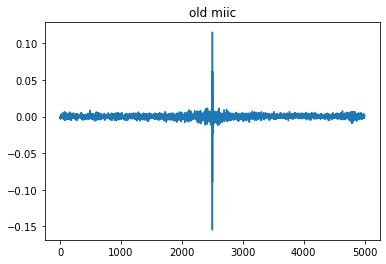

In [22]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_trace'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
plt.plot(mat['corr_trace'])
#print(len(np.sum(mat['corr_data'],axis=0)))
#print(mat['stats'])
plt.title('old miic')


(5001,)
         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T00:00:01.000000Z
         endtime: 2015-08-01T00:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T01:00:00.960000Z
      corr_start: 2015-08-01T00:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 2, 0, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 0.01, 'freqmax': 9}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 1, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2

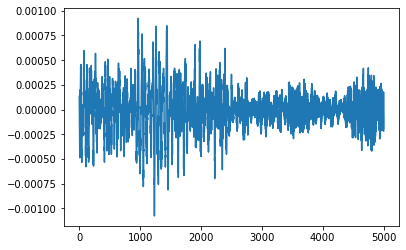

In [28]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_ndt/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
import matplotlib.pyplot as plt
#plt.plot(cst[1].data)
#print(cst[1].stats)
no_prepro = cst[0].data #/cst[1].data.max()
print(no_prepro.shape)
print(cst[0].stats)
#plt.plot(mat['corr_trace'])
#plt.plot(no_prepro)
plt.plot(mat['corr_trace'][:,0]-no_prepro)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


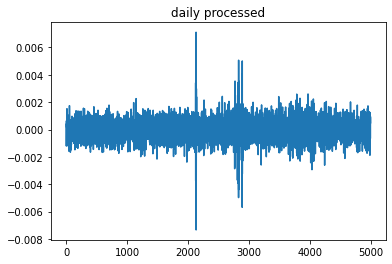

In [42]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('daily processed')
#print(cst[1].stats)
daily = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


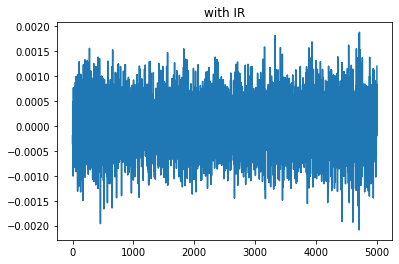

In [38]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_wir/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO', channel='HHZ-HHZ', tag='recombined')
    #print(cst)
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('with IR')
#print(cst[1].stats)
wir = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


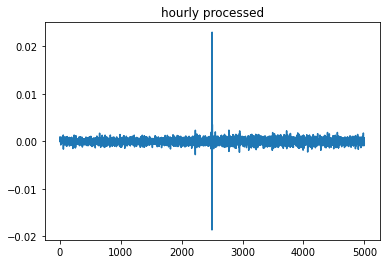

In [43]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('hourly processed')
#print(cst[1].stats)
hourly = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


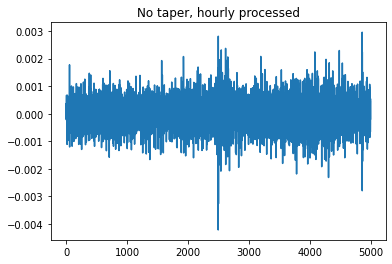

In [44]:

with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_no_taper/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('No taper, hourly processed')
#print(cst[1].stats)
hourly_nt = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


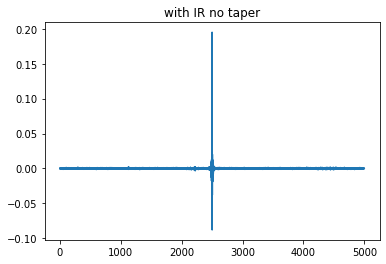

In [45]:
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_wir_no_taper/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('with IR no taper')
#print(cst[1].stats)
wir_nt = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imagi

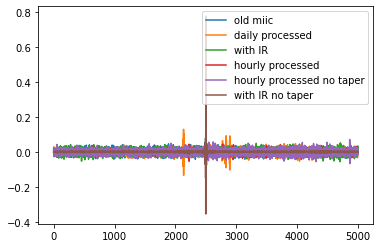

In [46]:
plt.plot(old)
plt.plot(daily)
plt.plot(wir)
plt.plot(hourly)
plt.plot(hourly_nt)
plt.plot(wir_nt)
plt.legend(['old miic', 'daily processed', 'with IR', 'hourly processed', 'hourly processed no taper', 'with IR no taper'])

1 Trace(s) in Stream:
D0.BDR.01.SHE | 2015-08-01T03:19:43.335000Z - 2015-08-02T00:00:00.000000Z | 200.0 Hz, 14883334 samples (masked) 1 Trace(s) in Stream:
D0.BDR.01.SHE | 2015-08-01T03:19:43.335000Z - 2015-08-02T00:00:00.000000Z | 200.0 Hz, 14883334 samples


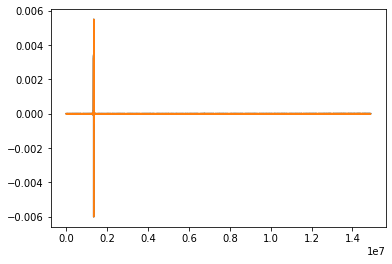

In [18]:
from obspy import read, Stream, read_inventory
import time
st = Stream(read('/home/pm/Documents/PhD/testdata/2015/D0/BDR/SHE.D/D0.BDR.01.SHE.D.2015.213')[3])
inv = read_inventory('/home/pm/Documents/PhD/testdata/inventory/inventory.xml')
# st.decimate(5)
st.attach_response(inv)
# st.detrend()
st_whole = st.copy()
st_whole.remove_response()
st_parts = Stream()
for st_part in st[0].slide(3600/.9,3600, include_partial_windows=True):
    delta = (st_part.stats.endtime-st_part.stats.starttime)*0.05
    st_parts.append((st_part.remove_response(taper_fraction=0.05)))
for ii, tr in enumerate(st_parts):
    delta = (tr.stats.endtime-tr.stats.starttime)*0.05
    if ii==0:
        tr.slice(starttime=st_part.stats.starttime, endtime=st_part.stats.endtime-2*delta)
    elif tr.stats.endtime == st_parts[-1].stats.endtime:
        continue
        #tr.slice(starttime=st_part.stats.starttime+delta, endtime=st_part.stats.endtime)
    else:
        tr.slice(starttime=st_part.stats.starttime+delta, endtime=st_part.stats.endtime-delta)
st_parts.merge()
print(st_parts,st_whole)
import matplotlib.pyplot as plt
x = st_parts[0].data-st_whole[0].data
#plt.plot(st_whole[0].data-st_parts[0].data)
plt.plot(st_parts[0].data)
plt.plot(st_whole[0].data)

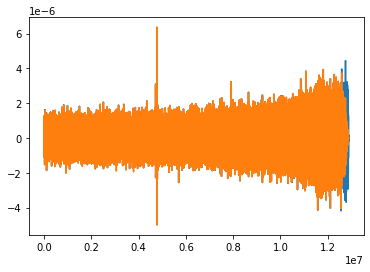

In [19]:
plt.plot(st_parts[0].data[int(2e6):])
plt.plot(st_whole[0].data[int(2e6):])

In [4]:
from obspy import Stream, Trace
import numpy as np
tr = Trace(np.array([0]))
tr1 = Trace(np.array([0, 1]))
tr2 = Trace(np.array([0,1,2]))
st = Stream([tr, tr1, tr2])
st.sort(keys=['npts'])
print(st[-1])

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples


In [5]:
from obspy import read
st = read()
print(st[0])

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [6]:

from obspy import UTCDateTime
import numpy as np
np.arange(UTCDateTime(500).timestamp, UTCDateTime(700).timestamp, 3)

array([ 500.,  503.,  506.,  509.,  512.,  515.,  518.,  521.,  524.,
        527.,  530.,  533.,  536.,  539.,  542.,  545.,  548.,  551.,
        554.,  557.,  560.,  563.,  566.,  569.,  572.,  575.,  578.,
        581.,  584.,  587.,  590.,  593.,  596.,  599.,  602.,  605.,
        608.,  611.,  614.,  617.,  620.,  623.,  626.,  629.,  632.,
        635.,  638.,  641.,  644.,  647.,  650.,  653.,  656.,  659.,
        662.,  665.,  668.,  671.,  674.,  677.,  680.,  683.,  686.,
        689.,  692.,  695.,  698.])

In [7]:
from obspy import Stream, Trace
import numpy as np
x = {}
x.setdefault('test',Stream()).append(Trace(np.arange(3)))
x.setdefault('test',Stream()).append(Trace(np.arange(9)))
print(x['test'])

2 Trace(s) in Stream:
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:08.000000Z | 1.0 Hz, 9 samples


In [10]:
for v in x:
    print(x[v])

2 Trace(s) in Stream:
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:08.000000Z | 1.0 Hz, 9 samples


(5001, 54)
(90000, 12)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


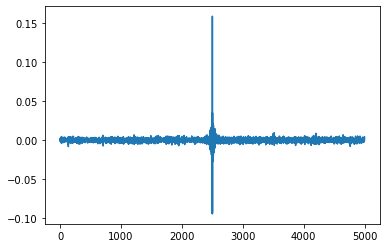

In [4]:
import numpy as np
A = np.load('/home/pm/Documents/PhD/testdata/A.npy')
print(A.shape)
B = np.load('/home/pm/Documents/PhD/testdata/A_old.npy')
print(B.shape)

from matplotlib import pyplot as plt
plt.plot(A[:-1,0])
#plt.plot(B[:,2])
#plt.plot(A[:-1,3]-B[:,4])
#print(np.tile(B[:,0],(12,1)).T.shape)
#np.argmin(abs(A[:-1,:]-np.tile(B[:,2],(12,1)).T),axis=1)
#plt.plot(np.divide(A[:-1,0],B[:,0]))

In [73]:
a = np.array([1,2])
np.tile(a,[3, 1])

array([[1, 2],
       [1, 2],
       [1, 2]])

In [1]:
import numpy as np
def spectralWhitening(B, args, params):
    """
    Spectal whitening of Fourier-transformed date

    Normalize the amplitude spectrum of the complex spectra in `B`. The
    `args` dictionary may contain the keyword `joint_norm`. If its value is
    True the normalization of sets of three traces are normalized jointly by
    the mean of their amplitude spectra. This is useful for later rotation of
    correlated traces in the ZNE system into the ZRT system.

    :type B: numpy.ndarray
    :param B: Fourier transformed time series data with frequency oriented\\
        along the first dimension (columns)
    :type args: dictionary
    :param args: arguments dictionary as described above
    :type params: dictionary
    :param params: not used here

    :rtype: numpy.ndarray
    :return: whitened spectal data
    """
    absB = np.absolute(B)
    if 'joint_norm' in list(args.keys()):
        if args['joint_norm']:
            assert B.shape[1] % 3 == 0, "for joint normalization the number\
                      of traces needs to the multiple of 3: %d" % B.shape[1]
            for ii in np.arange(0, B.shape[1], 3):
                absB[:, ii:ii+3] = np.tile(
                    np.atleast_2d(np.mean(absB[:, ii:ii+3], axis=1)).T, [1, 3])
    with np.errstate(invalid='raise'):
        try:
            B /= absB
        except FloatingPointError as e:
            errargs = np.argwhere(absB == 0)
            # Report error where there is zero divides for a non-zero freq
            if not np.all(errargs[:, 0] == 0):
                print(e)
                print(errargs)

    # Set zero frequency component to zero
    B[0, :] = 0.j

    return B


In [2]:
from obspy import read
st = read()
data = np.empty((st[0].stats.npts,3))
for ii,tr in enumerate(st):
    data[:,ii] = tr.data
dataft = np.fft.fft(data,axis=1)
from matplotlib import pyplot as plt
np.save('/home/pm/Documents/PhD/testdata/whitened_py2',spectralWhitening(dataft, {},{}))

In [8]:
from obspy import read
st = read()
data = np.empty((st[0].stats.npts,3))
for ii,tr in enumerate(st):
    data[:,ii] = tr.data
dataft = np.fft.fft(data,axis=1)
from matplotlib import pyplot as plt
np.save('/home/pm/Documents/PhD/testdata/whitened_py3',spectralWhitening(dataft, {},{}))

In [3]:
import numpy as np
py2 = np.load('/home/pm/Documents/PhD/testdata/whitened_py2.npy')
py3 = np.load('/home/pm/Documents/PhD/testdata/whitened_py3.npy')
from matplotlib import pyplot as plt
dif  = (py2-py3)
dif.min()

0j